---

# Single Neuron Model - Perceptrons

## Introduction

A Neural Network is combinations of basic Neurons — also called perceptrons (A basic Unit shown in the above diagram- green circle in middle) arranged in multiple layers as a network.

The perceptron is a single neuron model with the *sign* activation function as depicted in the figure below.

<p>
    <img src="single neuron.png" width="500" align="center">
</p>

## Algorithm
According to the figure above:

Pre-Activation: $z = w_{1}x_{1}^{(i)} + w_{2}x_{2}^{(i)} + b$

Post-Activation: $a = \phi(z)$

Activation Function: $$ \phi(z) = \left\{
    \begin{aligned}
    1 \quad z > 0 \\
    -1 \quad z < 0
    \end{aligned}
    \right. $$

Neuron cost function: $$C(\pmb w,b)=\frac{1}{4} \sum_{i=1}^N (\hat y^{(i)} - y^{(i)})^2 $$ 

THe algorithm steps:

1. Given labeled trying data {$(\pmb {x}^1, y^1), ... , (\pmb {x}^N, y^N)$}

2. For each i = 1, ..., N feed forward $\pmb {x}^i$ in to the neuron model and predict $\hat y^{(i)}$ 

    2.1 Perform the weight perceptron update rule: $\pmb {w} \leftarrow \pmb {w} - \frac{1}{2}(y^{(i)}-\hat y^{(i)}) \pmb {x}^i$ 

    2.2 Perform the bias perceptron update rule: $b \leftarrow  b - \frac{1}{2}(y^{(i)}-\hat y^{(i)})$

3. Repeat Step2 until either: 

    3.1 A maximum number of epochs has been reached. 
    
    3.2 The cost function is outputting a sufficient small error

---

## Data


First, let's have a look at the structure of the following data.

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

In [28]:
# Read the gender dataset into a pandas DataFrame object
df = pd.read_csv("gender_classification.csv")
df.iloc[:100]
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


The Perceptron is used on binary classification problems, which meets the classifications of our data. 

The perceptron can take in any number of feature measurments, but for simplicity we focus our attention on just two feature measurements, namely "forehead_width" and "forehead height". Moreover, we need to also convert the string names associated with each species to numerical values; for example, map "female" species to -1 and "male" species to 1. 

In the following, we use the first 500 columns data to implement.

In [36]:
# Store the desired species values in the numpy array y
y = df.iloc[0:500].gender.values
# Convert each entry of y with setosa to -1 and otherwise 1
y = np.where(y == 'Female', -1, 1)

# Store the desired feature measurements in the matrix X
X = pd.DataFrame(df[["forehead_width_cm", "forehead_height_cm"]].iloc[:500].values)


Take a look at the data visualization.

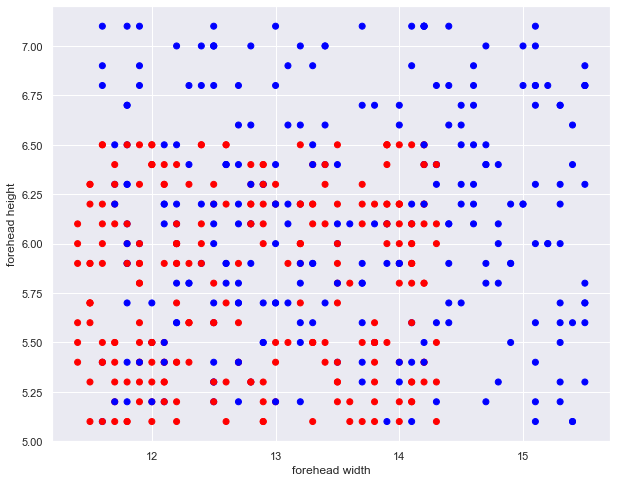

In [37]:
colors = ["red" if gender == -1 else "blue" for gender in y]
plt.figure(figsize = (10,8))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = colors)
plt.xlabel("forehead width")
plt.ylabel("forehead height")
plt.show()

Based on the plot, it looks like people with longer height or width of forehead are more possible to be male.

---

## Implement

In this part, first we write a custom python class that stores a scaling value for the cost function, the number of epochs when training, the weights (and bias), and the errors incured during training on a given instance. Moreover, this python class will also contain a training method, a input method, and a predict method. 

In [38]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs = 100):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Next, we train an instance over 100 epchos by the ```Perceptron``` class.

In [63]:
X = df[["forehead_width_cm", "forehead_height_cm"]].iloc[:500].values
percep1 = Perceptron()
percep1.train(X,y)

After training has finished we can call the ```Perceptron``` class ```predict``` method to view its current predictions given input features and compare predict and y.

In [64]:
y_hat1 = percep1.predict(X)
print(y == y_hat1)


[False  True False False  True False False  True  True  True False False
 False False  True False False  True  True False False False  True False
  True  True  True  True False False False False  True  True False False
  True  True  True False  True False False  True False False  True False
  True  True False  True  True  True False  True False False False  True
  True False  True False  True  True  True  True  True  True  True False
 False False  True  True  True False False False  True  True False  True
  True False False  True False False  True  True False  True False False
 False False  True  True False False False False False False  True False
 False  True False  True False False  True  True  True  True False False
  True  True  True False False  True False False  True  True False  True
 False  True False  True False  True False False  True False  True  True
 False  True False False  True False False  True False False  True  True
 False  True False False  True False False False Fa

As we can see from the output of the code above, the predicted values have not matched the true values very well. Let's visualize this result by ```plot_decision_regions``` function.

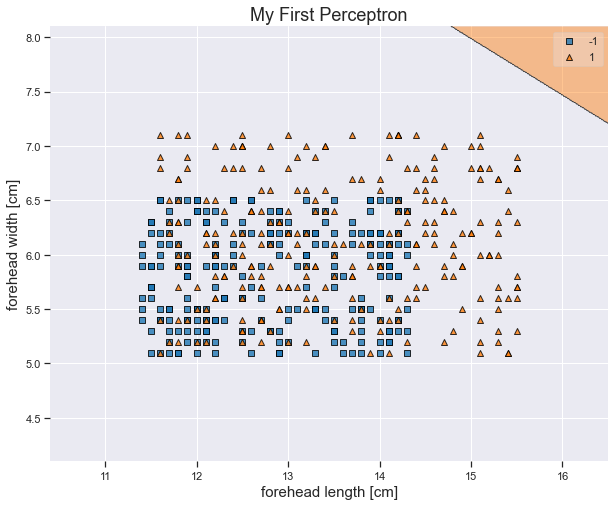

In [65]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = percep1)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("forehead length [cm]", fontsize = 15)
plt.ylabel("forehead width [cm]", fontsize = 15)
plt.show()

From the plot above, we can see the predict is not good but there is a linear serperator meeting our mentioned guess about the relation of forehead length/width and gender. We can also view these errors over each epoch.

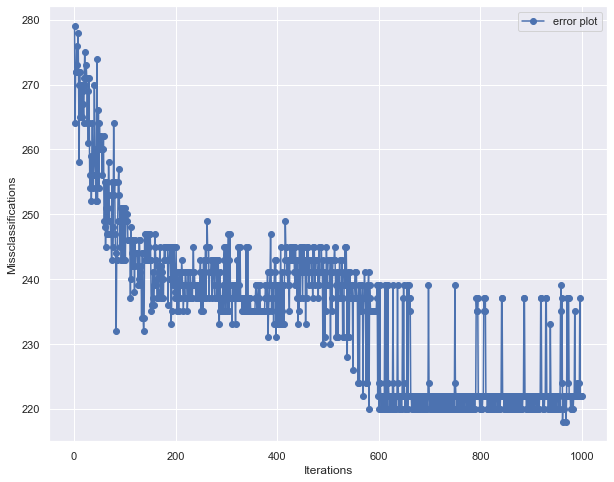

In [47]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(percep1.errors_)+1), percep1.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

This predit does not looks great, now we set eppchs as 1000 to train again to check if the predict will be better.

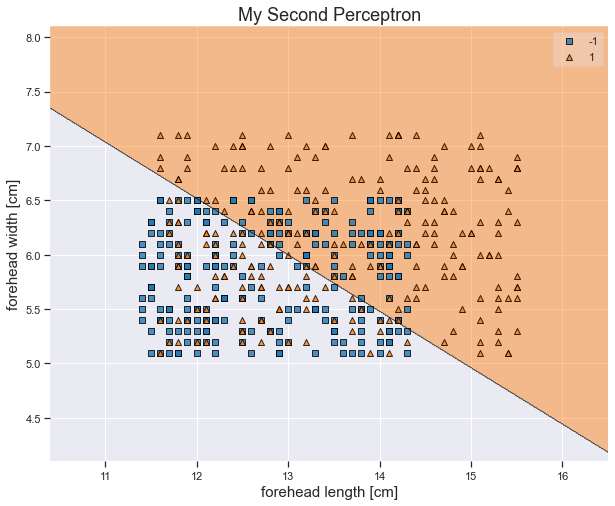

In [66]:
percep2 = Perceptron(epochs=1000)
percep2.train(X,y)
y_hat2 = percep2.predict(X)

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = percep2)
plt.title("My Second Perceptron", fontsize = 18)
plt.xlabel("forehead length [cm]", fontsize = 15)
plt.ylabel("forehead width [cm]", fontsize = 15)
plt.show()

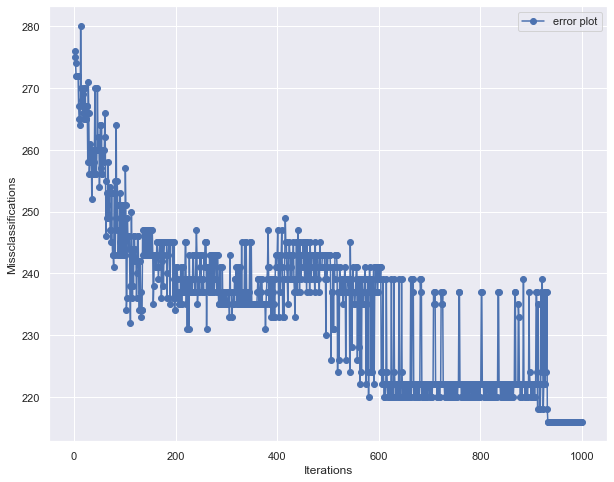

In [67]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(percep2.errors_)+1), percep2.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

From errors plot, it is better than the former but it's still not perfect. Maybe the single neuron model is not a good model to fit this data.